<H2>課題4: サッカーの試合における結果の予測</H2>
<p>過去の試合データを使って、試合の結果を予測します。</p>
<p>レッスン9で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み</H2>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

<H2>2. データの読み込み</H2>
<p>データはdatasetフォルダ直下にある"J1_data.csv"を使用します。</p>
<p>このデータセットはFootball-Data.co.jp (http://www.football-data.co.uk/japan.php) から引用したものを加工しています。</p>

In [3]:
# データを読み込んで変数 data に格納
data=pd.read_csv('dataset/J1_data.csv')

In [4]:
# データの最初の5行だけ表示
data.head()

,Home,Away,Home_Goals,Away_Goals
0,G-Osaka,Kobe,2,3
1,Hiroshima,Urawa,1,0
2,Nagoya,Shimizu,1,0
3,Sagan Tosu,C-Osaka,0,0
4,Sapporo,Iwata,0,0


In [5]:
# Homeチームのゴール数の平均と, Awayチームのゴール数の平均を計算して表示
me_Home_Goals= np.mean(data['Home_Goals'])
me_Away_Goals= np.mean(data['Away_Goals'])
print(me_Home_Goals)
print(me_Away_Goals)

1.4177570093457943
1.253271028037383


<H2>3. データ概要の把握</H2>
<p>先ほどの「ゴールの平均」を見ると、どうやらHomeチームとAwayチームで得点に差がありそうです。ヒストグラムを作図して詳細を確認してみましょう。</p>

(array([24., 35., 43.,  9.,  6.,  0.,  3.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

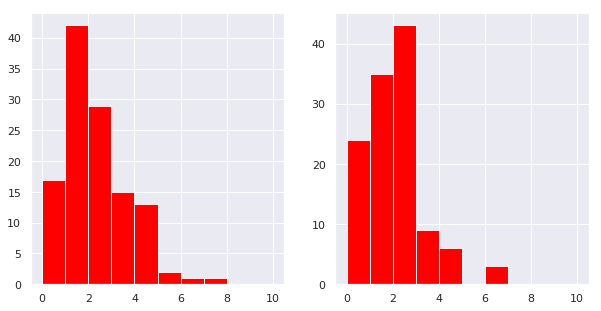

In [6]:
# プロットエリアを2つに分け、Urawaに関して「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
# なお、ヒストグラムの表示には Matplotlib の hist を使い、figureで2つのグラフを「並べて」表示すること。
# ※ histの詳細： https://matplotlib.org/2.2.2/api/_as_gen/matplotlib.pyplot.hist.html
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.hist(data.query('Home=="Urawa"')['Home_Goals'],color="red",range=(0,10))
ax2.hist(data.query('Away=="Urawa"')['Away_Goals'],color="red",range=(0,10))

(array([28., 26., 25., 20.,  1.,  3.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

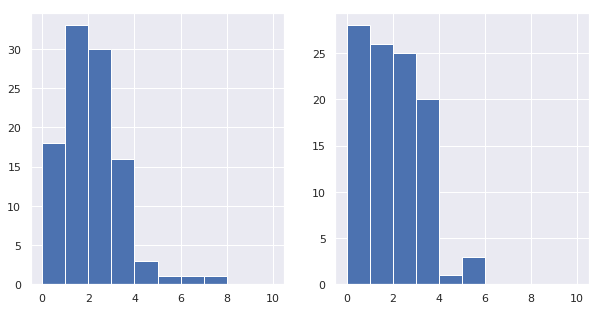

In [7]:
# もう1つ、どこか違うチームをピックアップして、同様に
# 「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.hist(data.query('Home=="G-Osaka"')['Home_Goals'],color="b",range=(0,10))
ax2.hist(data.query('Away=="G-Osaka"')['Away_Goals'],color="b",range=(0,10))

<H2>4. モデルの作成</H2>
<p>ここでは2通りのモデルを作成し、AICを確認してみましょう。</p>

In [8]:
# 説明変数：Away_Goals、HomeとAwayを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_1= smf.glm('Home_Goals ~ Away_Goals+Home+Away',data=data, family=sm.families.Poisson()).fit()
print(model_1.aic.round(3))

6448.858


In [9]:
# 説明変数：HomeとAway_Goalsを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_2= smf.glm('Home_Goals ~ Away_Goals+Home',data=data, family=sm.families.Poisson()).fit()
print(model_2.aic.round(3))

6472.639


In [10]:
# 上記2つのモデルを比較し、選択すべき最適なモデルについて詳細を表示
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Home_Goals   No. Observations:                 2140
Model:                            GLM   Df Residuals:                     2087
Model Family:                 Poisson   Df Model:                           52
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.4
Date:                Thu, 28 Nov 2019   Deviance:                       2433.7
Time:                        23:20:05   Pearson chi2:                 2.13e+03
No. Iterations:                    20   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0668      0.132     -0.505      0.614      -0.326       0.193
Home[T.Avispa Fukuoka]       -0.0592      0.269     -0.220      0.826      -0.587       0.469
Home[T.C-Osaka]               0.4320      0.133      3.252      0.001       0.172       0.692
Home[T.FC Tokyo]              0.4069      0.125      3.256      0.001       0.162       0.652
Home[T.G-Osaka]               0.5258      0.126      4.182      0.000       0.279       0.772
Home[T.Hiroshima]             0.4595      0.124      3.716      0.000       0.217       0.702
Home[T.Iwata]                 0.3488      0.135      2.579      0.010       0.084       0.614
Home[T.Kashima]               0.4952      0.123      4.020      0.000       0.254       0.737
Home[T.Kashiwa]               0.4445      0.124      3.581      0.000       0.201       0.688
Home[T.Kawasaki Frontale]     0.7168      0.119      6.041      0.000       0.484       0.949
Home[T.Kobe]                  0.3414      0.131      2.611      0.009       0.085       0.598
Home[T.Kofu]                 -0.1905      0.156     -1.218      0.223      -0.497       0.116
Home[T.Montedio Yamagata]    -0.1853      0.286     -0.649      0.517      -0.745       0.375
Home[T.Nagoya]                0.3949      0.129      3.055      0.002       0.142       0.648
Home[T.Oita]                 -0.1822      0.286     -0.638      0.523      -0.742       0.377
Home[T.Omiya Ardija]          0.1612      0.142      1.138      0.255      -0.116       0.439
Home[T.Sagan Tosu]            0.2572      0.129      1.994      0.046       0.004       0.510
Home[T.Sapporo]               0.2288      0.162      1.408      0.159      -0.090       0.547
Home[T.Shimizu]               0.2962      0.131      2.257      0.024       0.039       0.554
Home[T.Shonan]               -0.0340      0.159     -0.213      0.831      -0.346       0.278
Home[T.Tokushima]            -1.2166      0.458     -2.654      0.008      -2.115      -0.318
Home[T.Urawa]                 0.6208      0.120      5.155      0.000       0.385       0.857
Home[T.V-Varen Nagasaki]      0.1154      0.256      0.450      0.652      -0.387       0.617
Home[T.Vegalta Sendai]        0.4373      0.124      3.526      0.000       0.194       0.680
Home[T.Yamaga]                0.1723      0.245      0.702      0.482      -0.308       0.653
Home[T.Yokohama M.]           0.3622      0.126      2.875      0.004       0.115       0.609
Away[T.Avispa Fukuoka]        0.3390      0.193      1.755      0.079      -0.040       0.718
Away[T.C-Osaka]              -0.0896      0.127     -0.707      0.480      -0.338       0.159
Away[T.FC Tokyo]             -0.1706      0.119     -1.437      0.151      -0.403       0.062
Away[T.G-Osaka]              -0.0014      0.117     -0.012      0.991      -0.232       0.229
Away[T.Hiroshima]            -0.2424      0.120     -2.015  

In [11]:
# Home: Urawa, Away: KashimaでAwayのチームが0得点だった場合のHomeの得点を予測
d = {'Home':['Urawa'],'Away':['Kashima'],'Away_Goals':[0]}
df = pd.DataFrame(d)
model_1.predict(df)

0    1.575325
dtype: float64

In [12]:
# Home: Urawa, Away: KashimaでAwayのチームが2得点だった場合のHomeの得点を予測
d = {'Home':['Urawa'],'Away':['Kashima'],'Away_Goals':[2]}
df = pd.DataFrame(d)
model_1.predict(df)

0    1.730129
dtype: float64

<H2>5. シミュレーション</H2>
<p>ここまでの内容で「Homeの点数の予測値は、Awayの点数によって変わる」ことがわかりました。しかし、このままでは「どちらが勝つか」を明言することができません。</p>
<p>Awayの得点は、これまでのAwayでの得点平均をlambda（λ：強度）とするポアソン分布に従うことがわかっています。ですので、ポアソン分布から乱数を発生させ、その結果からHomeの得点を予測してみましょう。</p>

In [13]:
# 今回はKashimaがAwayですので、KashimaのAwayでの得点平均を計算
me_Away_Goals_K= np.mean(data.query('Away=="Kashima"')['Away_Goals'])
me_Away_Goals_K

1.6363636363636365

In [14]:
# 上記で求めた平均=lambda(強度：λ)としたポアソン分布から乱数を100個発生させる。np.random.poisson()を使うこと。
np.random.seed(1)
rand_Away_Goals = np.random.poisson(lam= me_Away_Goals_K, size=100)
rand_Away_Goals

array([2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 3, 1, 0, 0, 1, 3, 2, 0, 3, 1, 2,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 3, 0, 2, 3, 3, 2, 3, 3, 2, 0, 2, 3,
       0, 3, 0, 2, 4, 0, 0, 0, 2, 2, 1, 2, 1, 4, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 3, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 0, 4, 1, 5, 2, 4,
       0, 0, 1, 2, 0, 1, 3, 4, 2, 1, 3, 2])

In [15]:
# Awayの得点よりHomeの得点を予測
d = {'Home':['Urawa']*100,'Away':['Kashima']*100,'Away_Goals':rand_Away_Goals}
df = pd.DataFrame(d)
pred_Home_Goals = model_1.predict(df)
pred_Home_Goals

0     1.730129
1     1.650914
2     1.575325
3     1.575325
4     1.650914
5     1.730129
6     1.650914
7     1.575325
8     1.730129
9     1.575325
10    1.650914
11    1.813146
12    1.650914
13    1.575325
14    1.575325
15    1.650914
16    1.813146
17    1.730129
18    1.575325
19    1.813146
20    1.650914
21    1.730129
22    1.650914
23    1.575325
24    1.650914
25    1.650914
26    1.575325
27    1.650914
28    1.730129
29    1.730129
        ...   
70    1.730129
71    1.575325
72    1.575325
73    1.730129
74    1.730129
75    1.730129
76    1.650914
77    1.575325
78    1.730129
79    1.650914
80    1.730129
81    1.813146
82    1.575325
83    1.900145
84    1.650914
85    1.991320
86    1.730129
87    1.900145
88    1.575325
89    1.575325
90    1.650914
91    1.730129
92    1.575325
93    1.650914
94    1.813146
95    1.900145
96    1.730129
97    1.650914
98    1.813146
99    1.730129
Length: 100, dtype: float64

In [17]:
# Homeチームの得点が上回っているデータの個数を計算することで「Homeのチームが勝つ確率」を算出して、表示
result = np.count_nonzero(pred_Home_Goals > rand_Away_Goals) / len(pred_Home_Goals) *100
print(f'Homeのチームが勝つ確率は{result}%です')

Homeのチームが勝つ確率は53.0%です
